# Feed Forward Neural Network

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Constant Parameters
# Preprocessing Parameters
TRAIN_DIR = "../data/sample_1/"
MODEL_DIR = "../models/"
VALIDATION_SPLIT = 0.3
IMAGE_HEIGHT = IMAGE_WIDTH = 128
SEED = 1

# Training Parameters
NUM_EPOCHS = 20
BATCH_SIZE = 64
OPTIMIZER = keras.optimizers.Adam()
LOSS_FN = keras.losses.CategoricalCrossentropy()

In [15]:
# Model Architecture
def get_model(image_depth, num_classes):
    return keras.models.Sequential([
        keras.layers.Flatten(input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, image_depth)),
        keras.layers.Dense(1024, activation = "relu"),
        keras.layers.Dense(512, activation = "relu"),
        keras.layers.Dense(256, activation = "relu"),
        keras.layers.Dense(num_classes, activation = "softmax")
    ])

## Preprocessing - Grayscale + Augment

In [4]:
model_id = "ffnn_grayscale_augment"              # Unique Identifier used for saving model
color_mode = "rgb"                         # "rgb", "rgba" or "grayscale"

# DO NOT CHANGE
if color_mode == "grayscale":
    image_depth = 1
elif color_mode == "rgb":
    image_depth = 3
elif color_mode == "rgba":
    image_depth = 4
else:
    raise Exception()

In [5]:
# Data Augmentation Parameters
image_generator = ImageDataGenerator(
    validation_split = VALIDATION_SPLIT,
    rescale = 1./255,
    rotation_range = 45,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = 0.4
)

In [6]:
train_data_gen = image_generator.flow_from_directory(
    color_mode = color_mode,
    directory = TRAIN_DIR,
    batch_size = BATCH_SIZE,
    target_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    shuffle = True,
    seed = SEED,
    class_mode = "categorical",
    subset = "training"
)

Found 2800 images belonging to 10 classes.


In [7]:
validation_data_gen = image_generator.flow_from_directory(
    color_mode = color_mode,
    directory = TRAIN_DIR,
    batch_size = BATCH_SIZE,
    target_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    class_mode = "categorical",
    subset = "validation"
)

Found 1200 images belonging to 10 classes.


In [16]:
model = get_model(image_depth, train_data_gen.num_classes)

In [17]:
model.compile(
    optimizer = OPTIMIZER,
    loss = LOSS_FN,
    metrics = ["accuracy"]
)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              50332672  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 50,991,370
Trainable params: 50,991,370
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(
    train_data_gen,
    steps_per_epoch = train_data_gen.n // BATCH_SIZE,
    epochs = NUM_EPOCHS,
    validation_data = validation_data_gen
)

Epoch 1/20
43/43 [==============================] - 35s 821ms/step - loss: 81.9280 - accuracy: 0.0967 - val_loss: 2.4883 - val_accuracy: 0.1000
Epoch 2/20
43/43 [==============================] - 35s 813ms/step - loss: 2.3613 - accuracy: 0.1056 - val_loss: 2.2678 - val_accuracy: 0.1417
Epoch 3/20
43/43 [==============================] - 35s 821ms/step - loss: 2.2693 - accuracy: 0.1417 - val_loss: 2.2373 - val_accuracy: 0.1450
Epoch 4/20
43/43 [==============================] - 36s 826ms/step - loss: 2.2440 - accuracy: 0.1550 - val_loss: 2.2320 - val_accuracy: 0.1525
Epoch 5/20
43/43 [==============================] - 35s 822ms/step - loss: 2.2317 - accuracy: 0.1623 - val_loss: 2.2232 - val_accuracy: 0.1633
Epoch 6/20
43/43 [==============================] - 35s 819ms/step - loss: 2.2268 - accuracy: 0.1572 - val_loss: 2.2222 - val_accuracy: 0.1700
Epoch 7/20
43/43 [==============================] - 35s 815ms/step - loss: 2.2157 - accuracy: 0.1689 - val_loss: 2.1981 - val_accuracy: 0.165

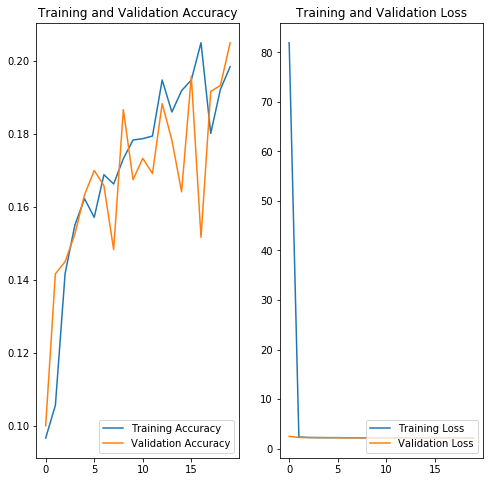

In [20]:
acc = history.history["accuracy"]
loss = history.history["loss"]
validation_acc = history.history["val_accuracy"]
validation_loss = history.history["val_loss"]

epochs_range = range(NUM_EPOCHS)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = "Training Accuracy")
plt.plot(epochs_range, validation_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, validation_loss, label = "Validation Loss")
plt.legend(loc = "lower right")
plt.title("Training and Validation Loss")
plt.show()

In [13]:
model.save(MODEL_DIR + "{}.h5".format(model_id))